### Store Sales Prediction

### Problem Statement : Predict the sales of the different stores of Big Mart according to the provided dataset.

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.shape   ## shape of dataset

(8523, 12)

##### Check missing values

In [5]:
s= df.isna().sum()
s

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
s[s>0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

### Drop statistically insignificant columns

In [7]:
df = df.drop(labels=['Item_Identifier'],axis=1)

### Categorical and Continous values Separation

In [8]:
def catconsep(df):
    cat = list(df.columns[df.dtypes=='object'])
    con = list(df.columns[df.dtypes!='object'])
    return cat,con

In [9]:
cat,con = catconsep(df)

In [10]:
cat

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [11]:
con

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

### Describe the data

In [12]:
df[cat].describe()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,6113,8523,8523
unique,5,16,10,3,3,4
top,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,5089,1232,935,2793,3350,5577


In [13]:
df[con].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Exploratory Data Analysis [EDA]
1. Univariate Analysis
2. Bivariate Analysis
3. Multivariate Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Univariate Analysis

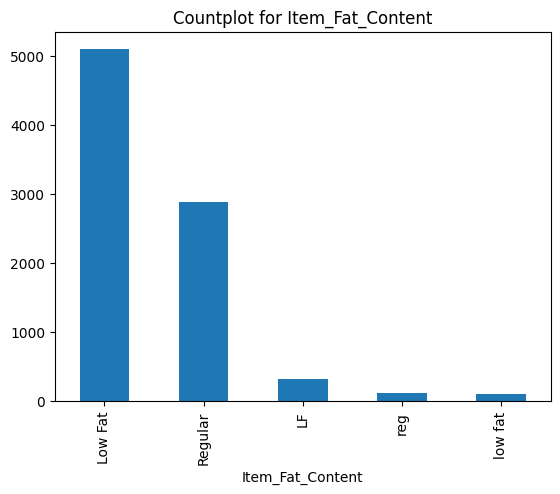

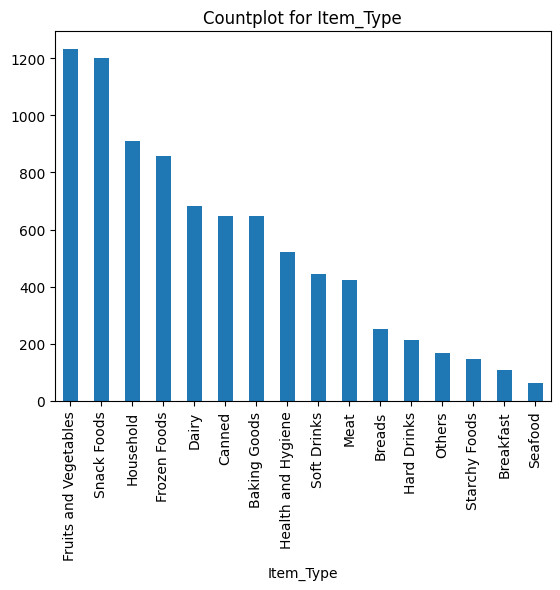

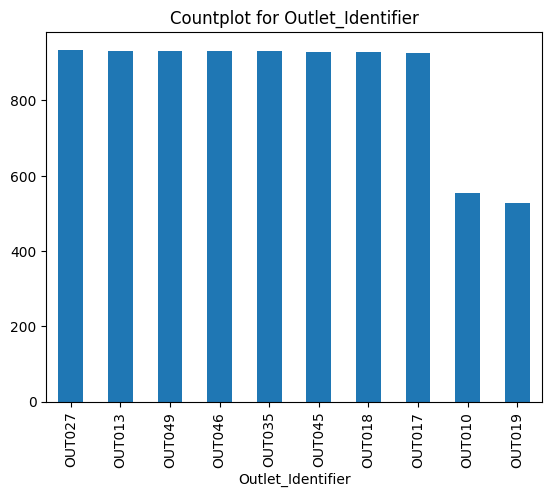

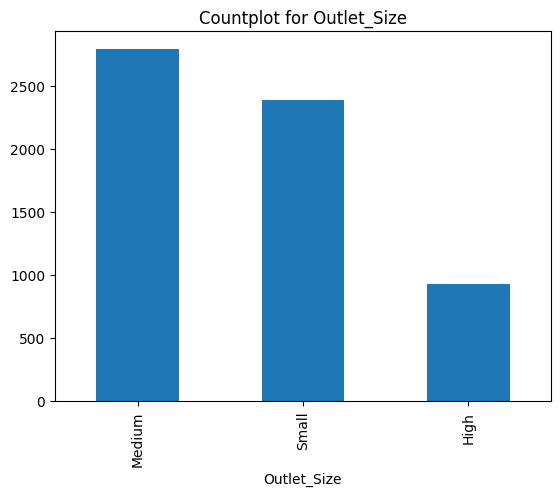

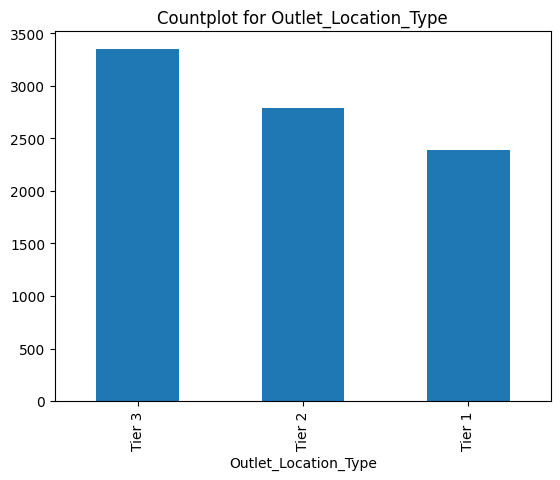

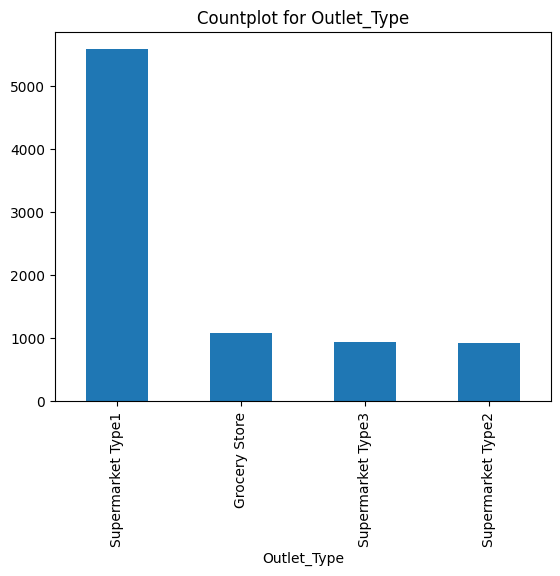

In [15]:
## Barplot for Categorical variables:
for i in cat:
    df[i].value_counts().plot(kind='bar', title = f'Countplot for {i}')
    plt.show()

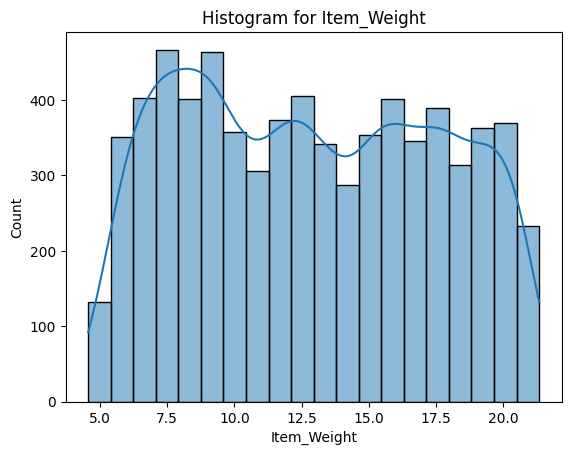

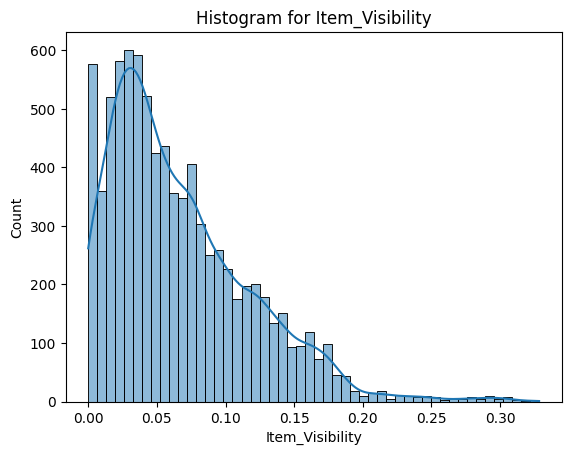

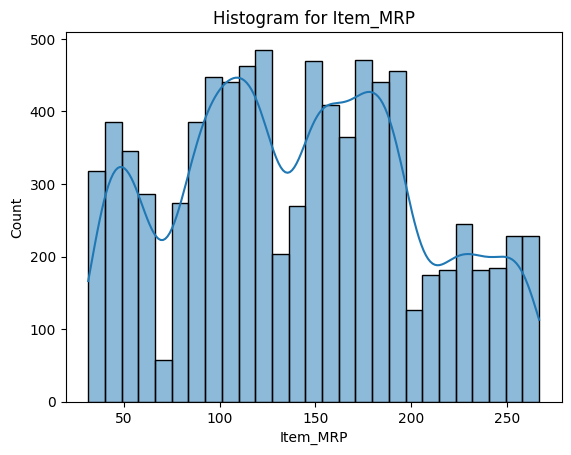

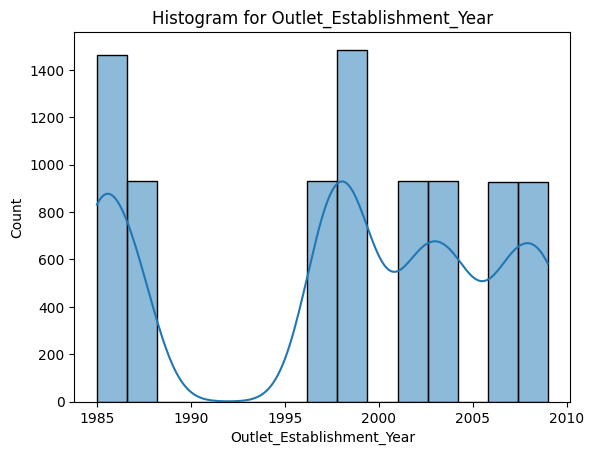

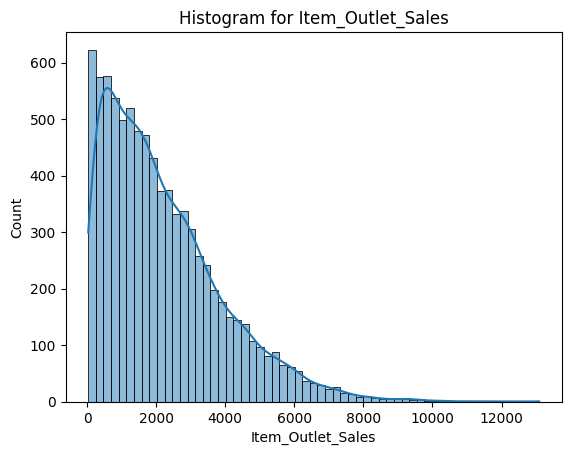

In [16]:
## Histogram for Continous Variables
for i in con:
    sns.histplot(data=df, x=i, kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

### Bivariate Analysis

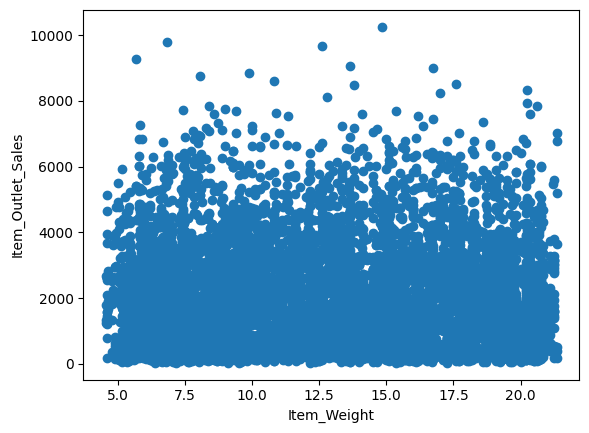

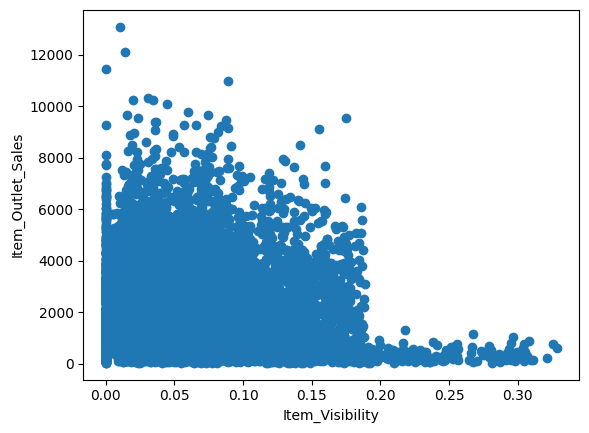

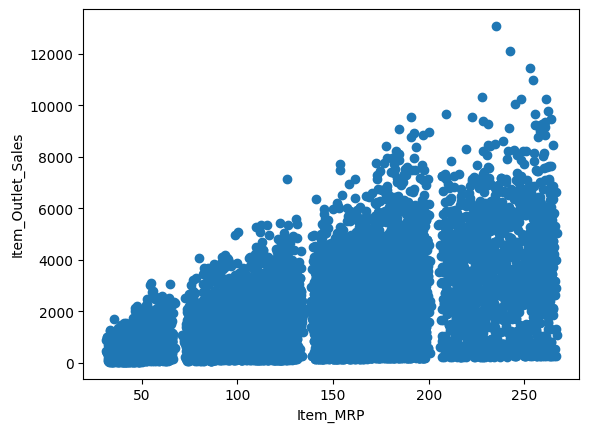

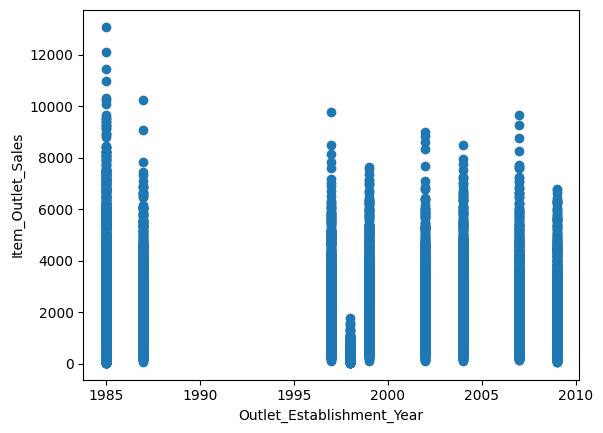

In [17]:
## Scatterplot
for i in con:
    if i!='Item_Outlet_Sales':
        plt.scatter(df[i],df['Item_Outlet_Sales'])
        plt.xlabel(i)
        plt.ylabel('Item_Outlet_Sales')
        plt.show()

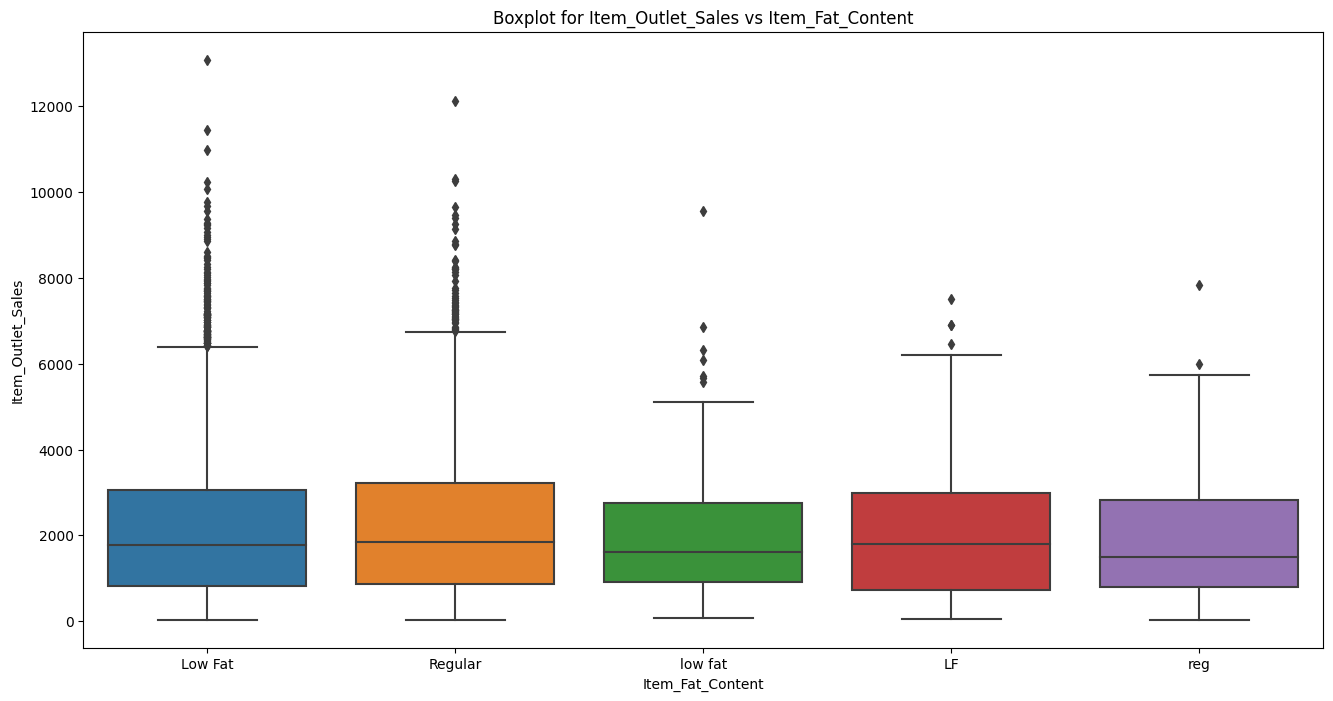

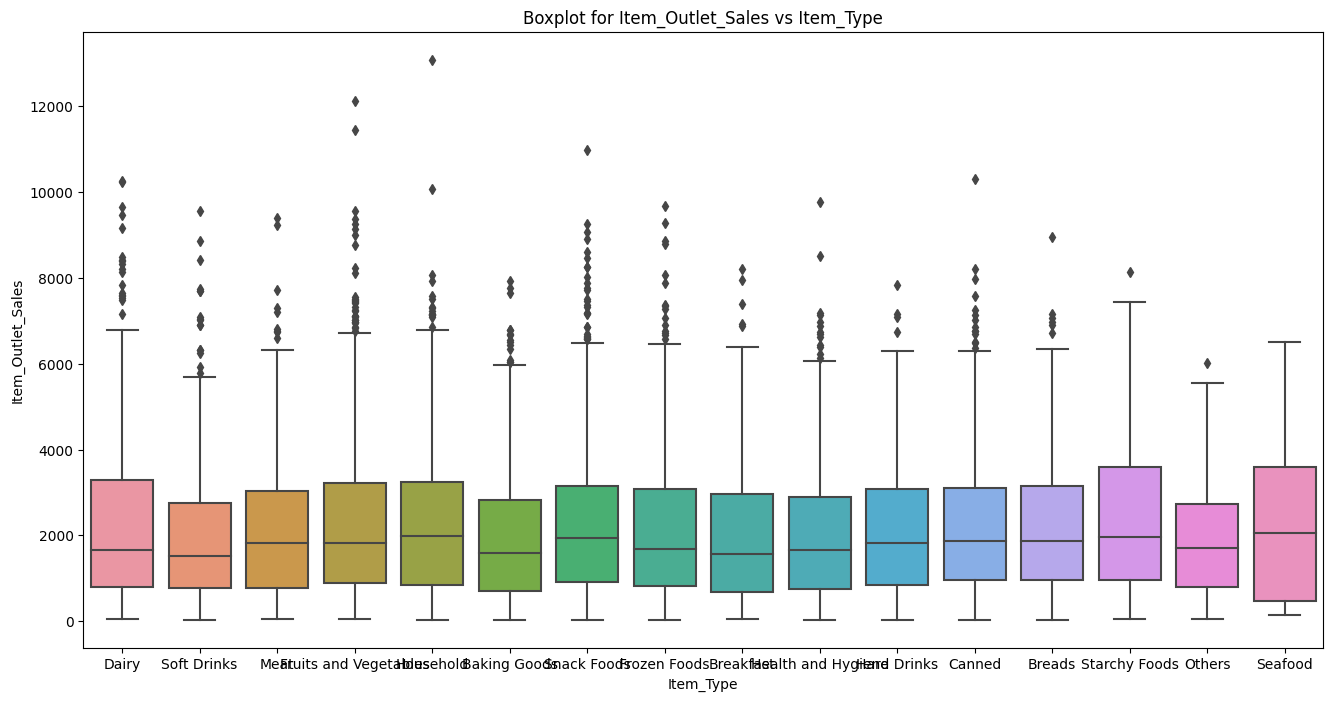

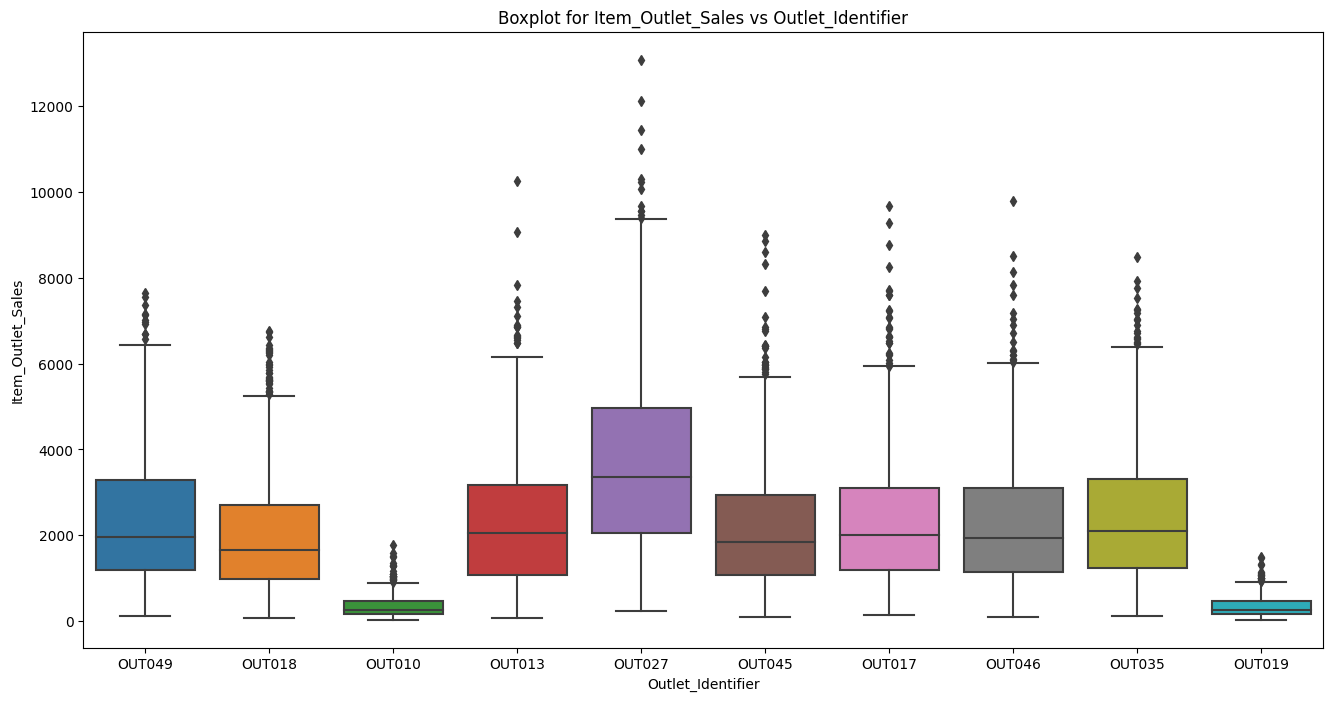

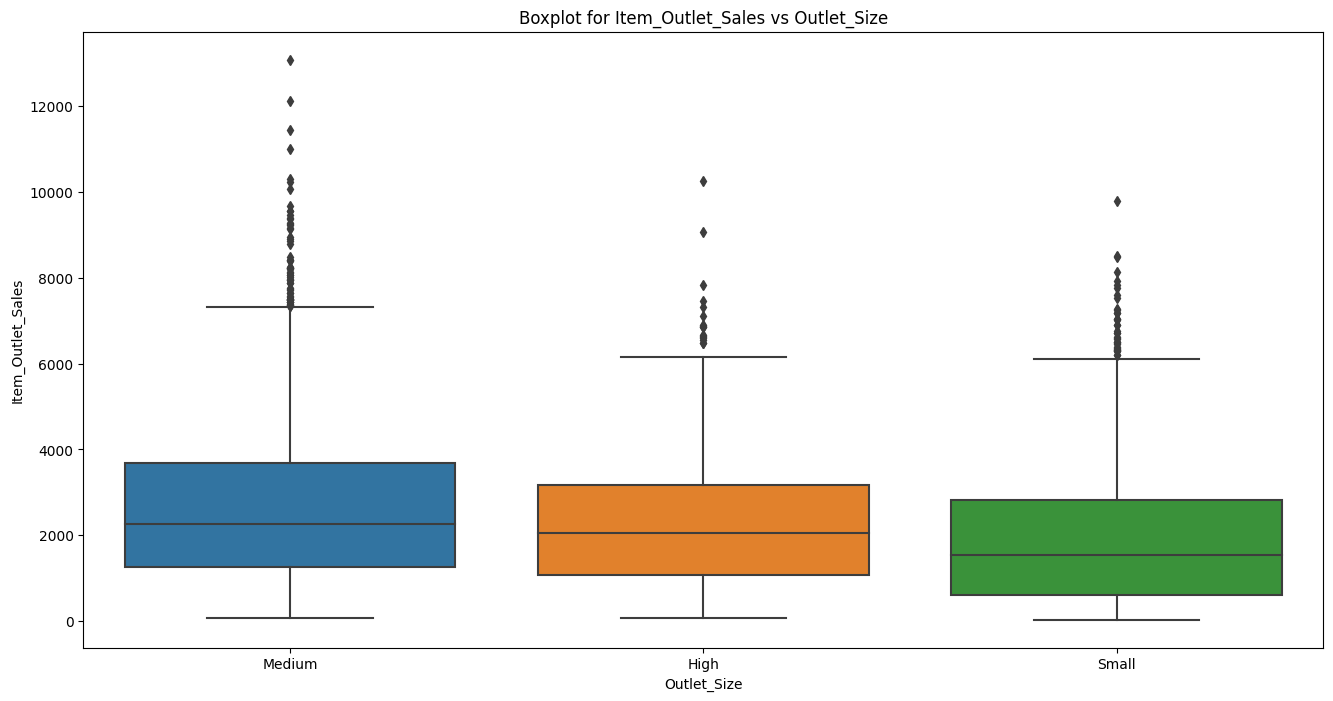

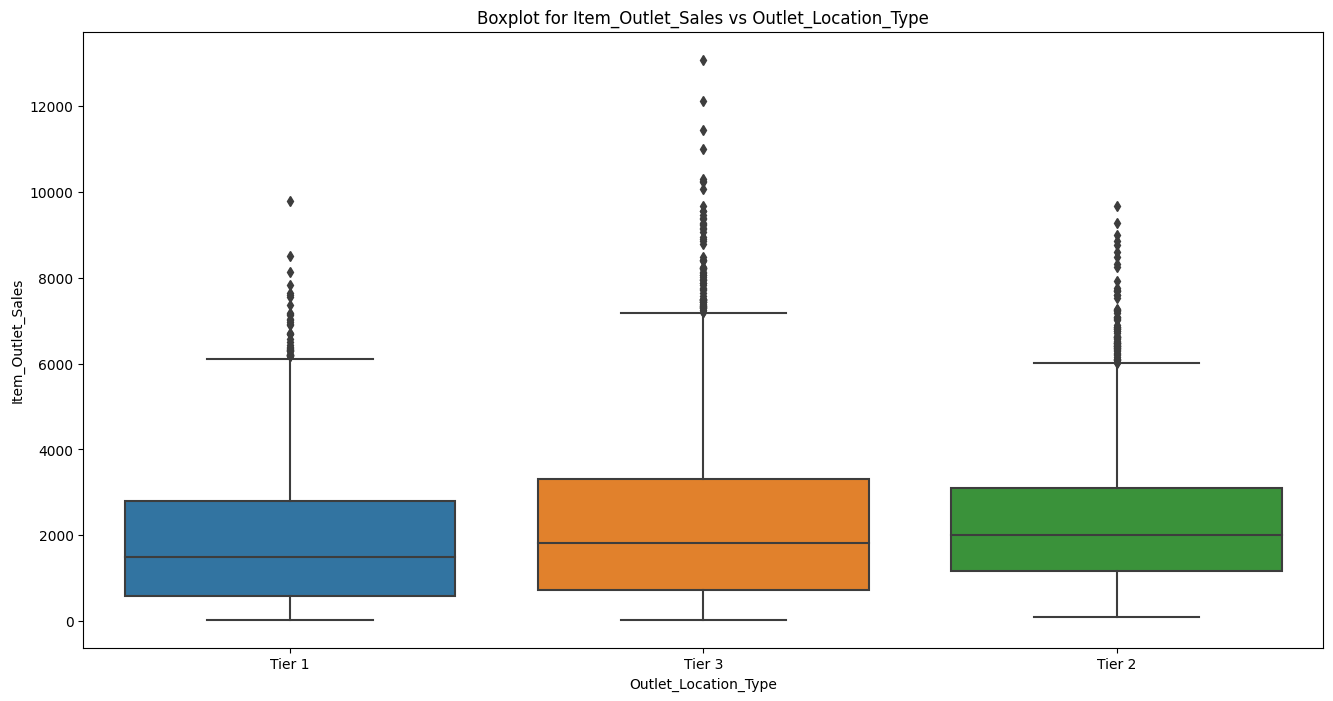

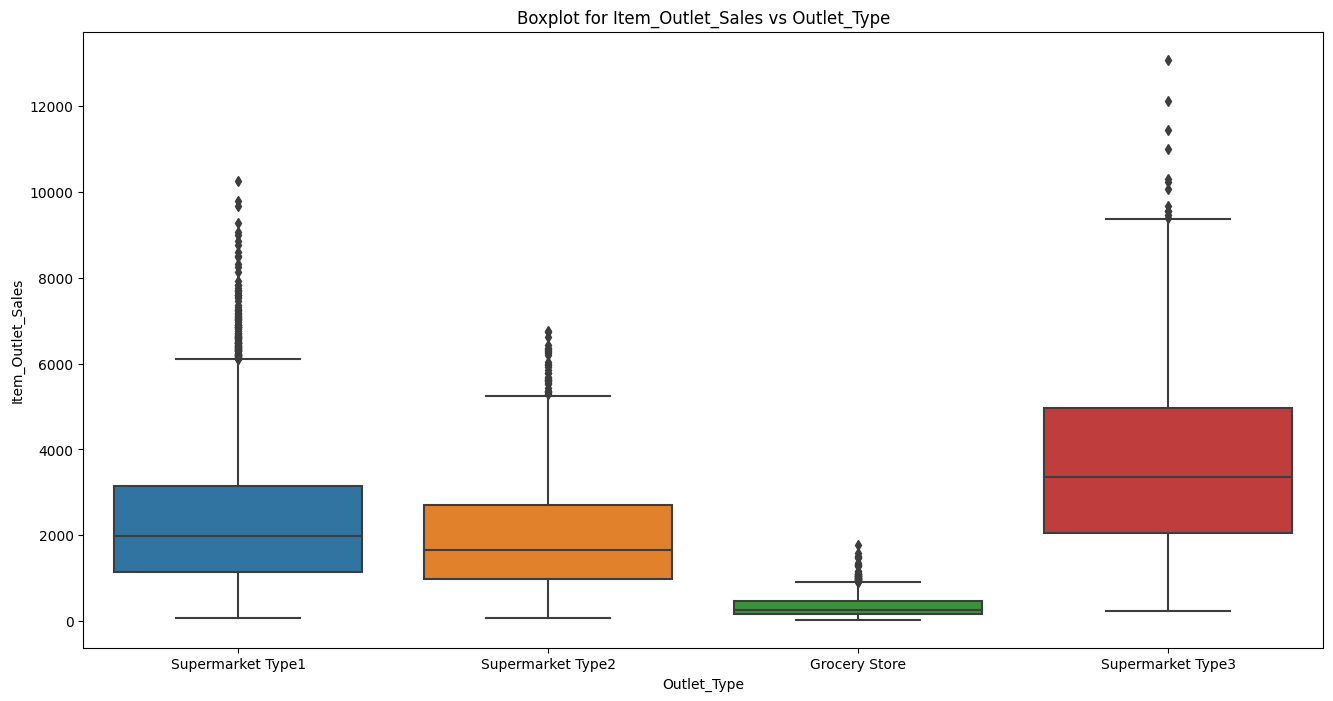

In [18]:
## Boxplot for continous features with Item_Outlet_Sales
for i in cat:
    plt.figure(figsize=(16,8))
    sns.boxplot(data=df,x=i,y='Item_Outlet_Sales')
    plt.title(f'Boxplot for Item_Outlet_Sales vs {i}')
    plt.show()

In [49]:
con

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

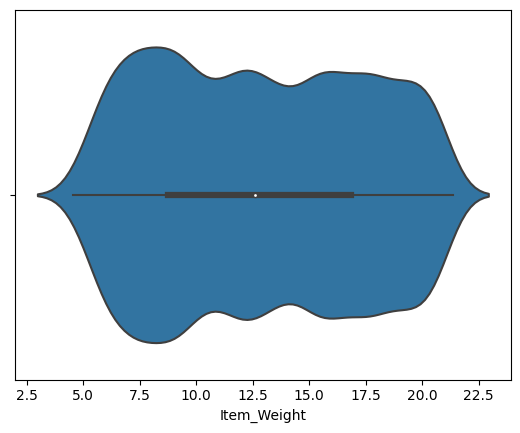

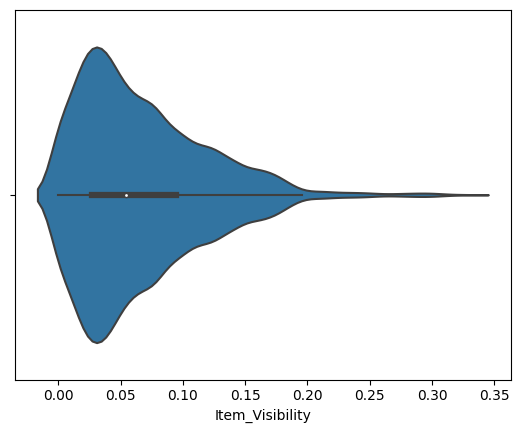

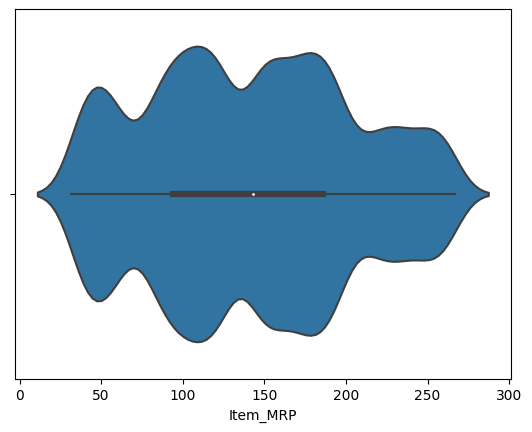

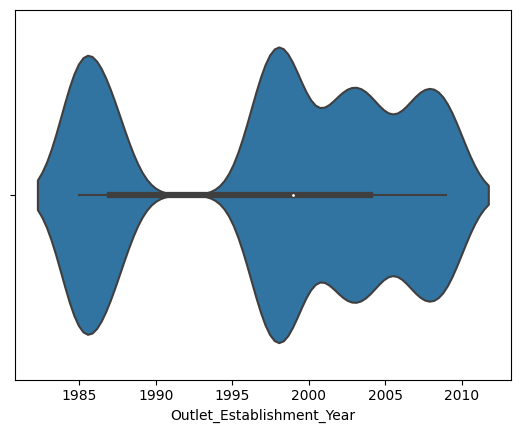

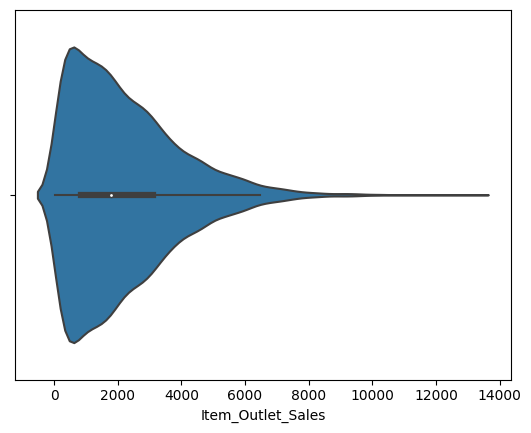

In [50]:
#axs= axs.flattern()
for i, var in enumerate(con):
    sns.violinplot(x=var, data=df)
    plt.show()

### Multivariate Analysis

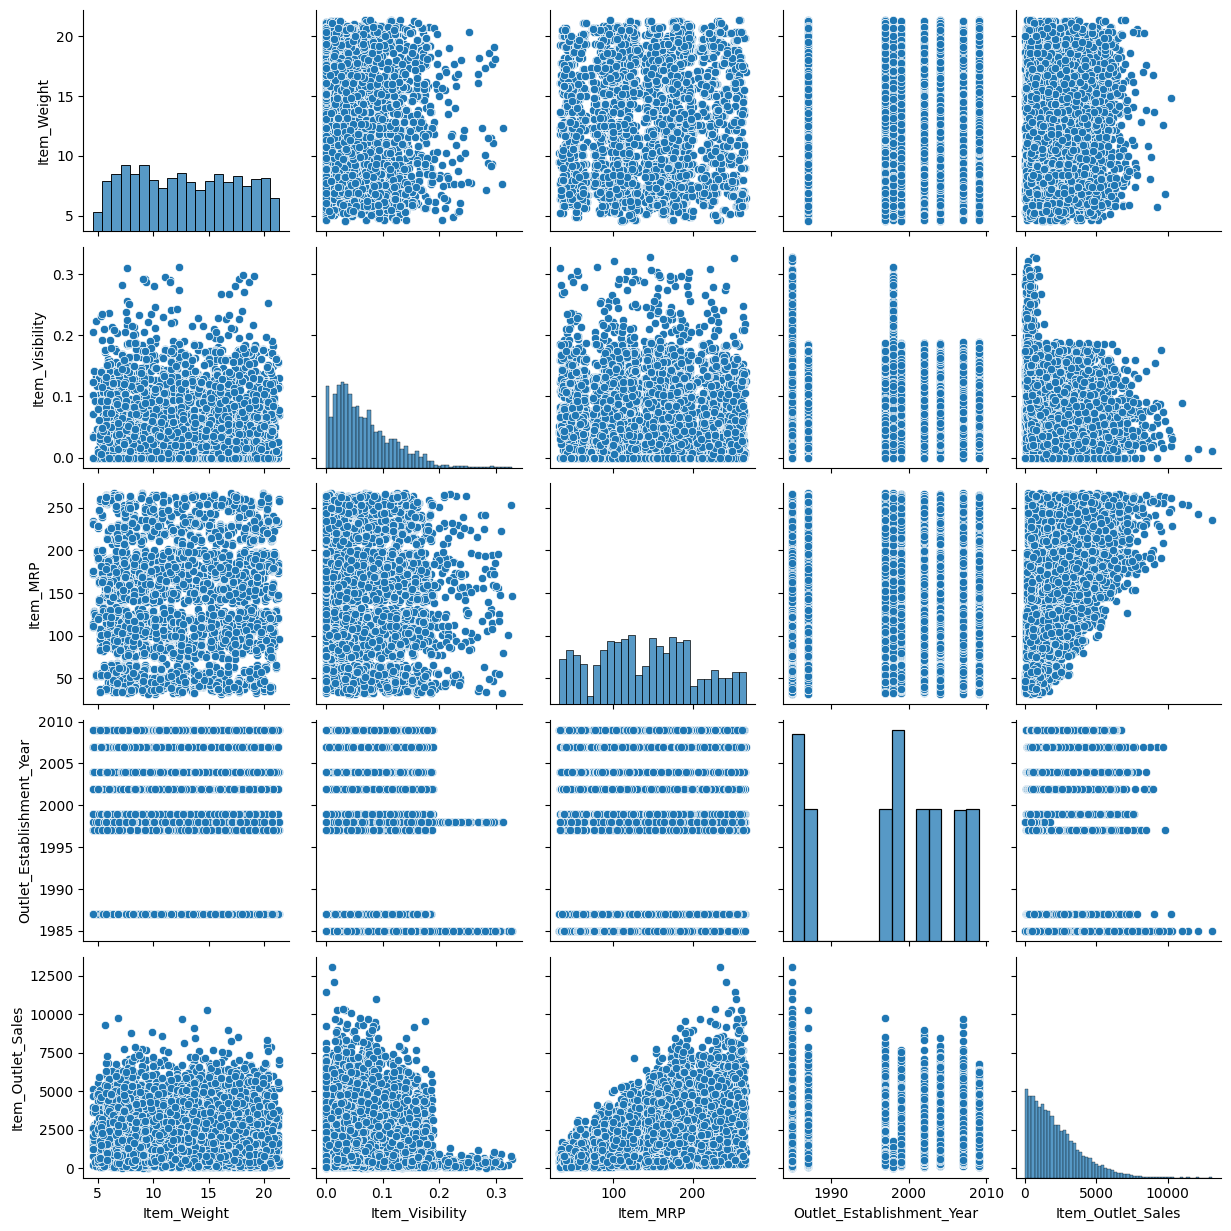

In [19]:
sns.pairplot(data=df,size=2.5)

## Data Preprocessing

In [20]:
# Separate X and Y
X = df.drop(labels=['Item_Outlet_Sales'], axis =1)
Y = df[['Item_Outlet_Sales']]

In [21]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [51]:
X.shape

(8523, 10)

In [22]:
Y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [52]:
Y.shape

(8523, 1)

## Building Pipeline for feature selection
1. num_pipeline : strategy='median', StandardScaler
2. cat_pipe1 : strategy='constant',OrdinalEncoder
3. cat_pipe2 : strategy='most_frequent', Ordinal Encoder

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [24]:
cat1,con1= catconsep(X)
cat1

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [25]:
con1

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [26]:
con

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [27]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='NotAvailable')),
                            ('ordinal',OrdinalEncoder())])

pre = ColumnTransformer([('num',num_pipe,con1),
                         ('cat1',cat_pipe1,cat1)])

In [28]:
X_pre = pre.fit_transform(X)
X_pre

array([[-0.83118663, -0.97073217,  1.74745381, ...,  1.        ,
         0.        ,  1.        ],
       [-1.63080955, -0.90811123, -1.48902325, ...,  1.        ,
         2.        ,  2.        ],
       [ 1.10872696, -0.95691733,  0.01004021, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.52363935, -0.59978449, -0.89720755, ...,  3.        ,
         1.        ,  1.        ],
       [-1.32562802,  1.53287976, -0.60797692, ...,  1.        ,
         2.        ,  2.        ],
       [ 0.46997492, -0.41193591, -1.05226104, ...,  3.        ,
         0.        ,  1.        ]])

In [29]:
cols = pre.get_feature_names_out()
cols

array(['num__Item_Weight', 'num__Item_Visibility', 'num__Item_MRP',
       'num__Outlet_Establishment_Year', 'cat1__Item_Fat_Content',
       'cat1__Item_Type', 'cat1__Outlet_Identifier', 'cat1__Outlet_Size',
       'cat1__Outlet_Location_Type', 'cat1__Outlet_Type'], dtype=object)

In [30]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__Item_Weight,num__Item_Visibility,num__Item_MRP,num__Outlet_Establishment_Year,cat1__Item_Fat_Content,cat1__Item_Type,cat1__Outlet_Identifier,cat1__Outlet_Size,cat1__Outlet_Location_Type,cat1__Outlet_Type
0,-0.831187,-0.970732,1.747454,0.139541,1.0,4.0,9.0,1.0,0.0,1.0
1,-1.630810,-0.908111,-1.489023,1.334103,2.0,14.0,3.0,1.0,2.0,2.0
2,1.108727,-0.956917,0.010040,0.139541,1.0,10.0,9.0,1.0,0.0,1.0
3,1.510904,-1.281758,0.660050,0.020085,2.0,6.0,0.0,2.0,2.0,0.0
4,-0.918719,-1.281758,-1.399220,-1.293934,1.0,9.0,1.0,0.0,2.0,1.0


In [31]:
s1 = X_pre.isna().sum()
s1

num__Item_Weight                  0
num__Item_Visibility              0
num__Item_MRP                     0
num__Outlet_Establishment_Year    0
cat1__Item_Fat_Content            0
cat1__Item_Type                   0
cat1__Outlet_Identifier           0
cat1__Outlet_Size                 0
cat1__Outlet_Location_Type        0
cat1__Outlet_Type                 0
dtype: int64

In [32]:
s1[s1>0]

Series([], dtype: int64)

### Perform Feature Selection

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

In [34]:
model = LinearRegression()
sel = SequentialFeatureSelector(model,direction='backward',n_jobs=-1)
sel_features = sel.fit_transform(X_pre,Y)
imp_cols = sel.get_feature_names_out()
imp_cols

array(['num__Item_Visibility', 'num__Item_MRP', 'cat1__Outlet_Identifier',
       'cat1__Outlet_Size', 'cat1__Outlet_Type'], dtype=object)

In [35]:
len(imp_cols)

5

In [36]:
sel_cols = []
for i in imp_cols:
    s = i.split('__')[1]
    sel_cols.append(s)

In [37]:
sel_cols

['Item_Visibility',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Type']

In [38]:
X_sel = X[sel_cols]
X_sel.head()

,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type
0,0.016047,249.8092,OUT049,Medium,Supermarket Type1
1,0.019278,48.2692,OUT018,Medium,Supermarket Type2
2,0.016760,141.6180,OUT049,Medium,Supermarket Type1
3,0.000000,182.0950,OUT010,NaN,Grocery Store
4,0.000000,53.8614,OUT013,High,Supermarket Type1


In [39]:
X_sel.nunique()

Item_Visibility      7880
Item_MRP             5938
Outlet_Identifier      10
Outlet_Size             3
Outlet_Type             4
dtype: int64

In [40]:
s = X_sel.isna().sum()
s

Item_Visibility         0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size          2410
Outlet_Type             0
dtype: int64

In [41]:
X_sel.shape

(8523, 5)

### Build the final pipeline

In [42]:
cat_sel, con_sel = catconsep(X_sel)
cat_sel

['Outlet_Identifier', 'Outlet_Size', 'Outlet_Type']

In [43]:
con_sel

['Item_Visibility', 'Item_MRP']

### Build the final pipeline

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
num_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre1 = ColumnTransformer([('num',num_pipe1,con_sel),
                          ('cat',cat_pipe1,cat_sel)])

In [46]:
X_sel_pre = pre1.fit_transform(X_sel)
X_sel_pre.toarray()

array([[-0.97073217,  1.74745381,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.90811123, -1.48902325,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.95691733,  0.01004021,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.59978449, -0.89720755,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.53287976, -0.60797692,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.41193591, -1.05226104,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [47]:
final_cols = pre1.get_feature_names_out()
final_cols

array(['num__Item_Visibility', 'num__Item_MRP',
       'cat__Outlet_Identifier_OUT010', 'cat__Outlet_Identifier_OUT013',
       'cat__Outlet_Identifier_OUT017', 'cat__Outlet_Identifier_OUT018',
       'cat__Outlet_Identifier_OUT019', 'cat__Outlet_Identifier_OUT027',
       'cat__Outlet_Identifier_OUT035', 'cat__Outlet_Identifier_OUT045',
       'cat__Outlet_Identifier_OUT046', 'cat__Outlet_Identifier_OUT049',
       'cat__Outlet_Size_High', 'cat__Outlet_Size_Medium',
       'cat__Outlet_Size_Small', 'cat__Outlet_Type_Grocery Store',
       'cat__Outlet_Type_Supermarket Type1',
       'cat__Outlet_Type_Supermarket Type2',
       'cat__Outlet_Type_Supermarket Type3'], dtype=object)

In [48]:
X_sel_pre = pd.DataFrame(X_sel_pre,columns=final_cols)
X_sel_pre

ValueError: Shape of passed values is (8523, 1), indices imply (8523, 19)

## train -test Split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [ ]:
xtrain.shape

(6818, 11)

In [ ]:
xtest.shape

(1705, 11)

In [ ]:
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
model.score(xtrain,ytrain)

0.5227271069627752

In [ ]:
model.score(xtest,ytest)

0.528211601105055